In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score


In [105]:
y=pd.read_csv("new raag names.csv")
y

,Ragas
0,Raag Aahir Bhairav
1,Raag Aahir Bhairav
2,Raag Aahir Bhairav
3,Raag Aahir Bhairav
4,Raag Aahir Bhairav
...,...
1249,Raag Sawani
1250,Raag Sawani
1251,Raag Sawani
1252,Raag Sawani


In [106]:
from xinput import X

In [107]:
X=np.array(X)
X.reshape(1254,1,120)

array([[[-135.94667   ,  123.95419   ,  -23.950743  , ...,
            2.6329165 ,   -1.7840394 ,   -1.3966994 ]],

       [[-133.869995  ,  126.657585  ,  -22.4356728 , ...,
            3.07580447,   -1.7900753 ,   -1.88454747]],

       [[-134.27159   ,  128.50029   ,  -22.067827  , ...,
            3.0289605 ,   -1.8279742 ,   -1.7181681 ]],

       ...,

       [[ -91.912949  ,  132.86714   ,  -22.203764  , ...,
           -2.2772617 ,   -2.0556195 ,    2.4431252 ]],

       [[ -82.3392639 ,  139.687973  ,  -23.7865791 , ...,
           -1.85449088,   -1.92759657,    2.0902319 ]],

       [[-134.938248  ,  114.927826  ,  -22.0179749 , ...,
           -1.81592453,   -1.73926389,    2.28632784]]])

In [108]:
y=np.array(y)
y

array([['Raag Aahir Bhairav'],
       ['Raag Aahir Bhairav'],
       ['Raag Aahir Bhairav'],
       ...,
       ['Raag Sawani'],
       ['Raag Sawani'],
       ['Raag Sawani']], dtype=object)

In [109]:
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#y=to_categorical(labelencoder.fit_transform(y))


le = preprocessing.LabelEncoder()
y=le.fit_transform(y)



C:\Users\mishr\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
y

array([ 5,  5,  5, ..., 60, 60, 60])

In [111]:
X=np.array(X)

In [112]:
import matplotlib.pyplot as plt
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [113]:

def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """


    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates RNN-LSTM model
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(72, activation='softmax'))#########104 karna h 

    return model


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 120, 64)           16896     
                                                                 
 lstm_25 (LSTM)              (None, 64)                33024     
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 72)                4680      
                                                                 
Total params: 58,760
Trainable params: 58,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
12/12 [==============================

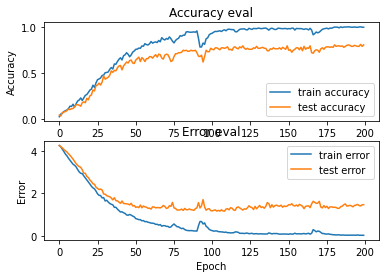

10/10 - 0s - loss: 1.0614 - accuracy: 0.8248 - 201ms/epoch - 20ms/step

Test accuracy: 0.824840784072876


In [133]:


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (120,1) # 130, 13
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=200)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

In [130]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, confusion_matrix, recall_score, precision_recall_curve

In [116]:
def metrics(actuals, predictions):
    print('Accuracy: ', np.round(accuracy_score(actuals, predictions), decimals=4))
    print('Precision: ', np.round(precision_score(actuals, predictions), decimals=4))
    print('Recall: ', np.round(recall_score(actuals, predictions), decimals=4))    
    print('F1-score ', np.round(f1_score(actuals, predictions), decimals=4))
    

In [117]:
y_pred = model.predict(X_test)

In [131]:

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = np.argmax(model.predict(X_test), axis=-1)

In [132]:
#y: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='weighted')
print('F1 score: %f' % f1)
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa Score: %f' % kappa)

Accuracy: 0.796178
Precision: 0.835280
Recall: 0.796178
F1 score: 0.800261
Cohens kappa Score: 0.791812


C:\Users\mishr\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mishr\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa Score: %f' % kappa)

Cohens kappa Score: 0.014876


In [ ]:

# kappa
 


Cohens kappa: 0.082172


ValueError: multi_class must be in ('ovo', 'ovr')